Name:Suraj Gude ROll NO:19141246 IR exp-9 Perform experiment to apply the web mining technique clustering algorithm on the suitable 
dataset.

In [ ]:
# Imports
from sklearn.datasets import make_blobs

# Generate 2D data points
X, _ = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
print(data.head())

     Object   X_value   Y_value
0  Object 1  1.005079  4.594642
1  Object 2  1.128478  4.328122
2  Object 3  2.117881  0.726845
3  Object 4  0.955626  4.385907
4  Object 5 -1.354017  2.769449


In [ ]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [ ]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[-1.48815728  2.81502145]
 [ 2.20533486  0.84929168]
 [ 1.06386762  4.39554682]]
[2 2 1 2 0 0 0 1 1 2]


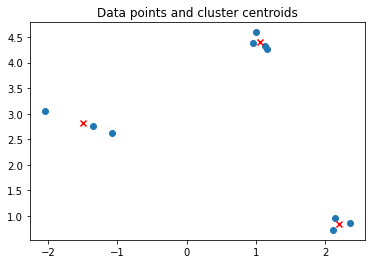

In [ ]:
# Plotting the cluster centers and the data points on a 2D plane
from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))


0.8810668519873337


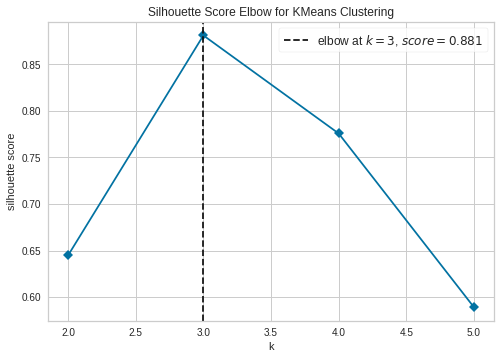

In [ ]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()   